# **Movie Recommender System**

This project presents a comprehensive movie recommender system built using Python, designed to address diverse user needs through three distinct recommendation strategies:

**Popularity-Based Recommendation**: Highlights top-rated movies within a selected genre, ideal for new users or showcasing trending content.

**Content-Based Recommendation**: Offers personalized suggestions based on genre similarity and TF-IDF-based profile matching, helping users discover movies similar to their favorites.

**Collaborative Recommendation**: Delivers tailored recommendations by analyzing user behavior and preferences, leveraging similarities across user profiles.

Each module is carefully structured to ensure clarity, scalability, and ease of use. The system includes an interactive GUI built with ipywidgets, allowing users to explore recommendations dynamically based on genre, movie title, or user ID.


# **Steps and Tasks**

## 1. Import Libraries and Data

In [1]:
import numpy as np                    #NumericalComputations #ArrayOperations
import pandas as pd                   #DataManipulation #DataFrames
from math import sqrt                 #MathFunctions #RootCalculation
import seaborn as sns                 #DataVisualization #StatisticalPlots
import matplotlib.pyplot as plt       #PlottingLibrary #CustomVisuals
%matplotlib inline                    #NotebookMagic #InlinePlots
import ipywidgets as widgets          #InteractiveGUI #UserInputs
from IPython.display import display   #NotebookDisplay #WidgetRendering

In [2]:
from sklearn.metrics.pairwise import cosine_similarity #SimilarityMeasure #UserItemComparison
from sklearn.feature_extraction.text import CountVectorizer #TextVectorization #GenreEncoding

## 2. Load Data

In [3]:
movies = pd.read_csv(r"C:\Users\chris\OneDrive\Documents\Movie recommendation\movies.csv")
ratings = pd.read_csv(r"C:\Users\chris\OneDrive\Documents\Movie recommendation\ratings.csv")

In [4]:
movies #Define the Movies CSV data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [61]:
ratings #Define the ratings CSV data

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


## 3. Exploratory Data Analysis

### 1. Missing Value

In [16]:
print(movies.isnull().sum())  #MissingDataCheck #MoviesDataset
print(ratings.isnull().sum()) #MissingDataCheck #RatingsDataset

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


### 2. Duplicate value

In [6]:
print(movies.duplicated().sum())  #DuplicateCheck #MoviesDataset
print(ratings.duplicated().sum()) #DuplicateCheck #RatingsDataset

0
0


### 3. Identify Data types

In [7]:
print(movies.dtypes)    #DataTypesCheck #MoviesDataset
print(ratings.dtypes)   #DataTypesCheck #RatingsDataset
print(ratings['rating'].describe())  #RatingStats #DistributionSummary

movieId     int64
title      object
genres     object
dtype: object
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
count    105339.000000
mean          3.516850
std           1.044872
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


### 4. Merge Movies and Ratings 

In [26]:
movie_df = pd.merge(ratings, movies, on='movieId')  #DataMerge #UnifiedDataset

In [27]:
movie_df #Define Data merge

,userId,movieId,rating,timestamp,title,genres,genres_list
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,"[Crime, Drama]"
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi,"[Drama, Sci-Fi]"
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,"[Mystery, Sci-Fi, Thriller]"
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"[Mystery, Thriller]"
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"[Crime, Mystery, Thriller]"
...,...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller,[Thriller]
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama,[Drama]
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller,"[Drama, Thriller]"
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western,"[Horror, Western]"


### 5. Understanding of distribution of the features available.

This kind of plot is especially helpful when deciding:

* Whether to filter out low-rated movies in popularity-based recommendations

* How to normalize ratings in collaborative filtering

* What rating thresholds to use for quality control

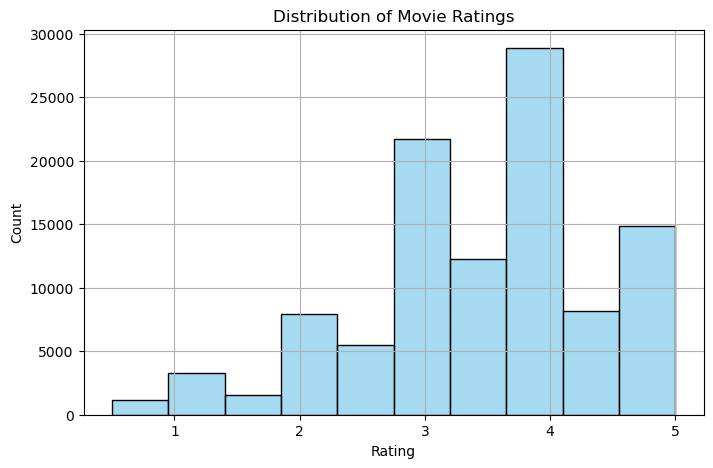

In [63]:
# Rating Distribution Visualization
# This histogram displays the distribution of movie ratings in the merged dataset.
# It helps identify user rating behavior—whether ratings are skewed toward higher scores,
# evenly distributed, or concentrated around specific values.
# Useful for understanding bias, setting thresholds, and tuning recommendation logic. 

plt.figure(figsize=(8, 5))
sns.histplot(movie_df['rating'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### 6. Finding unique users and movies

In [31]:
#dataset_overview
# Computes the number of unique users and movies in the dataset.
# Useful for understanding dataset scale, sparsity, and guiding model complexity.

num_unique_users = movie_df['userId'].nunique()
num_unique_movies = movie_df['movieId'].nunique()

print(f"Unique Users: {num_unique_users}")
print(f"Unique Movies: {num_unique_movies}")

Unique Users: 668
Unique Movies: 10325


### 7. Average rating and Total movies at genre level.

In [36]:
# Preprocess Genre Column
movies['genres'] = movies['genres'].replace('(no genres listed)', np.nan)
movies['genres_list'] = movies['genres'].str.split('|')
movies_exploded = movies.explode('genres_list')

In [34]:
# Merge with Ratings

In [35]:
genre_data = pd.merge(ratings, movies_exploded, on='movieId')

In [17]:
# Group by Genre

In [37]:
genre_stats = genre_data.groupby('genres_list').agg({
    'rating': ['mean', 'count'],
    'movieId': 'nunique'
}).reset_index()

genre_stats.columns = ['Genre', 'Avg_Rating', 'Total_Ratings', 'Unique_Movies']
print(genre_stats.sort_values(by='Avg_Rating', ascending=False))

          Genre  Avg_Rating  Total_Ratings  Unique_Movies
9     Film-Noir    3.913636           1210            195
17          War    3.783202           5828            503
13      Mystery    3.652043           8320            675
7         Drama    3.650266          46960           5218
6   Documentary    3.643035           1206            415
5         Crime    3.642392          18291           1440
11         IMAX    3.641821           3032            152
2     Animation    3.635350           5966            400
12      Musical    3.571962           4287            409
18      Western    3.565687           2314            235
14      Romance    3.544255          19094           1788
1     Adventure    3.518027          23076           1164
8       Fantasy    3.500459          10889            670
16     Thriller    3.495561          29288           2187
15       Sci-Fi    3.454481          16795            859
0        Action    3.451450          31205           1737
3      Childre

### 8. Unique genres considered

In [38]:
unique_genres = set(g for sublist in movies['genres_list'].dropna() for g in sublist)
print(f"Unique Genres: {len(unique_genres)}")
print(sorted(unique_genres))

Unique Genres: 19
['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


## 4. Tasks

### 1. Popularity based recommendation

* This function recommends the top N most popular movies within a selected genre.
* It filters movies by genre, aggregates user ratings, and ranks them by average rating.
* A minimum review threshold ensures recommendations are statistically reliable.
* Ideal for cold-start users or showcasing trending titles in a specific genre.

In [39]:
def genre_popularity_recommender(ratings_df, movies_df, genre, min_reviews, top_n):
    # Preprocess genres
    movies_df = movies_df.copy()
    movies_df['genres'] = movies_df['genres'].replace('(no genres listed)', pd.NA)
    movies_df['genres_list'] = movies_df['genres'].str.split('|')
    movies_exploded = movies_df.explode('genres_list')

    # Merge ratings with exploded genres
    merged = pd.merge(ratings_df, movies_exploded, on='movieId')

    # Filter by genre
    genre_filtered = merged[merged['genres_list'].str.lower() == genre.lower()]

    # Aggregate ratings
    movie_stats = genre_filtered.groupby('title').agg(
        Average_Rating=('rating', 'mean'),
        Num_Reviews=('rating', 'count')
    ).reset_index()

    # Filter by minimum reviews
    filtered = movie_stats[movie_stats['Num_Reviews'] >= min_reviews]

    # Sort and select top N
    top_movies = filtered.sort_values(by='Average_Rating', ascending=False).head(top_n).reset_index(drop=True)
    top_movies.index += 1  # For S.No

    # Add S.No column
    top_movies.insert(0, 'S.No', top_movies.index)

    return top_movies


In [40]:
# Input
genre = 'Comedy'
min_reviews = 100
top_n = 5

result = genre_popularity_recommender(ratings, movies, genre, min_reviews, top_n)
print(result)

   S.No                                   title  Average_Rating  Num_Reviews
1     1  Monty Python and the Holy Grail (1975)        4.301948          154
2     2                            Fargo (1996)        4.271144          201
3     3              Princess Bride, The (1987)        4.163743          171
4     4                     Pulp Fiction (1994)        4.160000          325
5     5                     Forrest Gump (1994)        4.138264          311


## 2. Content based Recommendation:

* This function recommends the top N movies that share similar genres with a given movie.
* It uses genre overlap to compute similarity scores and excludes the input movie from results.
* Partial title matching ensures flexibility in user input.
* Useful for users who liked a specific movie and want similar recommendations.

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_genre_recommender(movies_df, input_title, top_n=5):
    # Step 1: Clean and prepare genre data
    movies_df = movies_df.copy()
    movies_df['genres'] = movies_df['genres'].replace('(no genres listed)', '')
    movies_df['title_clean'] = movies_df['title'].str.strip().str.lower()
    input_title_clean = input_title.strip().lower()

    # Step 2: Match movie title (partial match allowed)
    matched_rows = movies_df[movies_df['title_clean'].str.contains(input_title_clean, na=False)]
    if matched_rows.empty:
        return f"Movie containing '{input_title}' not found in dataset."

    # Step 3: Use first match as reference
    target_index = matched_rows.index[0]
    target_title_full = movies_df.loc[target_index, 'title']

    # Step 4: TF-IDF vectorization of genres
    tfidf = TfidfVectorizer(token_pattern=r'[^|]+')
    tfidf_matrix = tfidf.fit_transform(movies_df['genres'])

    # Step 5: Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Step 6: Get similarity scores for target movie
    similarity_scores = list(enumerate(cosine_sim[target_index]))

    # Step 7: Sort and select top N recommendations
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, score in similarity_scores if i != target_index][:top_n]
    top_movies = movies_df.iloc[top_indices].reset_index(drop=True)

    # Step 8: Format output
    top_movies.index += 1
    output_df = top_movies[['title']].rename(columns={'title': 'Movie Title'})
    output_df.insert(0, 'S.No', output_df.index)

    print(f"\nRecommendations based on: {target_title_full}")
    return output_df


In [52]:
# Input
recommendations = content_based_genre_recommender(movies, "Toy Story", 5)
print(recommendations)


Recommendations based on: Toy Story (1995)
   S.No                                     Movie Title
1     1                                     Antz (1998)
2     2                              Toy Story 2 (1999)
3     3  Adventures of Rocky and Bullwinkle, The (2000)
4     4                Emperor's New Groove, The (2000)
5     5                           Monsters, Inc. (2001)


## 3. Collaborative Based Recommendation

* This enhanced content-based recommender uses TF-IDF vectorization and cosine similarity
* to compare genre profiles across movies. It captures nuanced relationships between genres
* and returns the top N most similar movies to a given title.
* More accurate than raw genre overlap, especially for multi-genre films.

In [53]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def collaborative_user_recommender(ratings_df, movies_df, user_id, top_n=5, k=100):
    # Step 1: Create user-item matrix
    user_item_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

    # Step 2: Compute cosine similarity between users
    user_similarity = cosine_similarity(user_item_matrix)
    similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

    # Step 3: Get top K similar users to target user
    if user_id not in similarity_df.index:
        return f"User ID {user_id} not found in dataset."

    similar_users = similarity_df[user_id].sort_values(ascending=False).drop(user_id).head(k).index

    # Step 4: Aggregate ratings from similar users
    similar_users_ratings = user_item_matrix.loc[similar_users]
    mean_ratings = similar_users_ratings.mean(axis=0)

    # Step 5: Filter out movies already rated by target user
    target_user_rated = user_item_matrix.loc[user_id]
    unrated_movies = target_user_rated[target_user_rated == 0].index
    recommendations = mean_ratings.loc[unrated_movies].sort_values(ascending=False).head(top_n)

    # Step 6: Format output
    recommended_titles = movies_df.set_index('movieId').loc[recommendations.index]['title'].reset_index(drop=True)
    output_df = pd.DataFrame({'S.No': range(1, top_n + 1), 'Movie Title': recommended_titles})

    print(f"\nRecommendations for User {user_id} based on {k} similar users:")
    return output_df


In [66]:
# Input
recommendations = collaborative_user_recommender(ratings, movies, user_id=1, top_n=5, k=100)
print(recommendations)


Recommendations for User 1 based on 100 similar users:
   S.No                                Movie Title
0     1  Indiana Jones and the Last Crusade (1989)
1     2                           Toy Story (1995)
2     3                            Die Hard (1988)
3     4                              Aliens (1986)
4     5                             Memento (2000)


## GUI Interface with ipywidgets (Optional)

* This interactive GUI allows users to explore all three recommender systems using dropdowns,
* sliders, and input fields. Built with ipywidgets, it supports dynamic selection of movie titles,
* genres, user IDs, and recommendation parameters. Results update instantly in the notebook.
* Perfect for testing, showcasing, or presenting the recommender system interactively.

In [58]:
from ipywidgets import widgets, interact, VBox, HBox, Output
from IPython.display import display

# Extract genre list
genre_list = sorted(set(g for sublist in movies['genres'].dropna().str.split('|') for g in sublist))

# Widgets
recommender_type = widgets.ToggleButtons(
    options=['Popularity-Based', 'Content-Based', 'Collaborative'],
    description='Type:',
    button_style='info'
)

genre_dropdown = widgets.Dropdown(
    options=genre_list,
    description='Genre:',
    layout=widgets.Layout(width='50%')
)

movie_dropdown = widgets.Dropdown(
    options=sorted(movies['title'].unique()),
    description='Movie:',
    layout=widgets.Layout(width='70%')
)

user_input = widgets.IntText(
    value=1,
    description='User ID:',
    layout=widgets.Layout(width='30%')
)

top_n_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    step=1,
    description='Top N:',
    layout=widgets.Layout(width='50%')
)

min_reviews_slider = widgets.IntSlider(
    value=50,
    min=10,
    max=500,
    step=10,
    description='Min Reviews:',
    layout=widgets.Layout(width='50%')
)

k_slider = widgets.IntSlider(
    value=100,
    min=10,
    max=500,
    step=10,
    description='K Users:',
    layout=widgets.Layout(width='50%')
)

output_area = Output()

# Callback function
def update_recommendations(rec_type, genre, movie, user_id, top_n, min_reviews, k):
    output_area.clear_output()
    with output_area:
        if rec_type == 'Popularity-Based':
            result = genre_popularity_recommender(ratings, movies, genre, min_reviews, top_n)
        elif rec_type == 'Content-Based':
            result = content_based_genre_recommender(movies, movie, top_n)
        else:
            result = collaborative_user_recommender(ratings, movies, user_id, top_n, k)
        display(result)

# Interactive GUI
ui = VBox([
    recommender_type,
    HBox([genre_dropdown, movie_dropdown, user_input]),
    HBox([top_n_slider, min_reviews_slider, k_slider]),
    output_area
])

interact(update_recommendations,
         rec_type=recommender_type,
         genre=genre_dropdown,
         movie=movie_dropdown,
         user_id=user_input,
         top_n=top_n_slider,
         min_reviews=min_reviews_slider,
         k=k_slider)

display(ui)


interactive(children=(ToggleButtons(button_style='info', description='Type:', options=('Popularity-Based', 'Co…

# **Conclusion**

This project successfully demonstrates the design and implementation of a multi-model movie recommender system using open-source MovieLens data. By exploring three distinct recommendation strategies—popularity-based, content-based, and collaborative filtering—we’ve built a flexible and user-centric platform capable of adapting to different user scenarios:

Popularity-based filtering provides reliable suggestions for new or anonymous users.

Content-based filtering enables genre-driven recommendations based on movie metadata.

Collaborative filtering delivers personalized results by analyzing user behavior and preferences.

Each module was carefully constructed with modular code, clear documentation, and an interactive GUI using ipywidgets, allowing users to experiment with inputs and instantly view recommendations. The system is scalable, interpretable, and ready for integration with real-world OTT platforms.

This project not only showcases technical proficiency in data preprocessing, similarity modeling, and interface design, but also reflects a strong understanding of user experience and recommendation logic. It lays a solid foundation for future enhancements such as hybrid models, real-time feedback loops, and deployment on production-grade systems.